## Understanding the Dataset

Our dataset contains the tweets from the Indian users and their views on the coronavirus pandemic and the lockdown set by the Indian government. These tweets contains the following hashtags: #coronavirus, #coronavirusoutbreak, #coronavirusPandemic, #covid19, #covid_19, #epitwitter, #ihavecorona. This dataset has the following colomns:<br>
1. status_id: The status id of the user profile.
2. user_id: The user id of the user profile.
3. created_id: The timestamp of the tweet created.
4. screen_name: The display name of the user.
5. text: The tweet.
6. source: The source from where the tweet was created.
7. reply_to_status_id: The status of the tweet whether it is a reply to another status id.
8. reply_to_user_id: The status of the tweet whether it is a reply to another user id.
9. reply_to_screen_name: The status of the tweet whether it is a reply to another user profile.
10. favourites_count: The number of likes on that tweets.
11. retweet_count: The number of retweets.
12. country_code: The country code which is IN( India)
13. place_full_name: The location of the user.
14. place_type: The type of location of the user.
15. followers_count: The followers count of the user.
16. friends_count: The friends count of the user.
17. account_lang:  The official language registered by the user.
18. account_created_at: The timestamp of the Twitter account created by the user.
19. verified: Contains the verification status of the user account.
20. lang: The language in which the tweets was created.

## Importing the Libraries

In [43]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import json
import os
from collections import Counter
import datetime as dt

## Reading the Dataset

In [2]:
tweets = pd.read_csv(r'C:\Users\tejas\Desktop\Covid_Tweet_India.csv')
tweets.head(10)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1249850149498568704,1078338149833555969,2020-04-14T00:01:11Z,dhruvvjyoti,May the spirit of the season of new year form ...,Twitter for Android,NaN,NaN,NaN,False,False,30,0,IN,"Dibrugarh, India",city,5,17,NaN,2018-12-27T17:13:44Z,False,en
1,1249854370021134336,767395763101937664,2020-04-14T00:17:57Z,RaghulPonnan,Without shouts and people's together and this...,Twitter for Android,NaN,NaN,NaN,False,False,994,0,IN,"Coimbatore, India",city,87,386,NaN,2016-08-21T16:19:42Z,False,en
2,1249856459392741382,15401107,2020-04-14T00:26:15Z,shahidakhtar,The CIA has privately advised its workforce th...,Twitter for Android,NaN,NaN,NaN,False,False,38955,0,IN,"Ghaziabad, India",city,741,685,NaN,2008-07-12T05:29:59Z,False,en
3,1249857453425954816,87385342,2020-04-14T00:30:12Z,iiirdi,Your \ncurrent \nsituation \nis giving you \na...,Twitter for Android,NaN,NaN,NaN,False,False,2753,0,IN,"Hyderabad, India",city,467,273,NaN,2009-11-04T07:23:33Z,False,en
4,1249860818860204032,1034185472950652929,2020-04-14T00:43:35Z,_jahangir127_,#COVID19 #CoronavirusOutbreakindia #CoronaStop...,Twitter for Android,NaN,NaN,NaN,False,False,470,0,IN,"Anand, India",city,8,13,NaN,2018-08-27T21:06:45Z,False,und
5,1249861205176365056,1135215332115673088,2020-04-14T00:45:07Z,Anup_Tripathi80,"Maharashtra: World's smallest living woman, Jy...",Twitter for Android,NaN,NaN,NaN,False,False,8238,0,IN,"Gorakhpur, India",city,117,568,NaN,2019-06-02T16:03:21Z,False,en
6,1249862117613645824,879136273,2020-04-14T00:48:44Z,himal_h,Happy Vishu Every one 😍 In this troublesome ti...,Instagram,NaN,NaN,NaN,False,False,149,0,IN,"Bengaluru South, India",city,122,1080,NaN,2012-10-14T02:14:54Z,False,en
7,1249862347776069632,106617662,2020-04-14T00:49:39Z,govindbiswas,#stayhome #staysafe #covid #quarantine #stayhe...,Twitter for Android,NaN,NaN,NaN,False,False,4825,0,IN,"Bhopal, India",city,1425,2304,NaN,2010-01-20T03:43:12Z,False,und
8,1249862465996775424,106617662,2020-04-14T00:50:07Z,govindbiswas,#stayhome #staysafe #covid #quarantine #stayhe...,Twitter for Android,NaN,NaN,NaN,False,False,4825,0,IN,"Bhopal, India",city,1425,2304,NaN,2010-01-20T03:43:12Z,False,und
9,1249862563946323969,106617662,2020-04-14T00:50:31Z,govindbiswas,#stayhome #staysafe #covid #quarantine #stayhe...,Twitter for Android,NaN,NaN,NaN,False,False,4825,0,IN,"Bhopal, India",city,1425,2304,NaN,2010-01-20T03:43:12Z,False,und


In [3]:
tweets.shape

(70903, 22)

Our dataset contains 70903 rows and 22 columns.

In [4]:
tweets.describe()

,status_id,user_id,reply_to_status_id,reply_to_user_id,favourites_count,retweet_count,followers_count,friends_count,account_lang
count,7.090300e+04,7.090300e+04,7.652000e+03,1.082500e+04,70903.000000,70903.000000,7.090300e+04,7.090300e+04,0.0
mean,1.249689e+18,4.338264e+17,1.248822e+18,2.663765e+17,8658.636094,2.079912,9.791121e+03,7.679339e+02,NaN
std,3.399104e+15,5.143917e+17,1.366014e+16,4.452333e+17,24835.964064,24.855361,1.915247e+05,8.772046e+03,NaN
min,1.244053e+18,7.547910e+05,5.020660e+17,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN
25%,1.246824e+18,3.508162e+08,1.246432e+18,1.174341e+08,176.000000,0.000000,4.200000e+01,8.500000e+01,NaN
50%,1.249665e+18,3.017980e+09,1.249004e+18,1.062743e+09,1268.000000,0.000000,2.090000e+02,2.520000e+02,NaN
75%,1.252560e+18,9.659102e+17,1.252068e+18,7.477730e+17,6172.000000,1.000000,1.039000e+03,6.970000e+02,NaN
max,1.256008e+18,1.255959e+18,1.255995e+18,1.255882e+18,687781.000000,3818.000000,1.740362e+07,1.493093e+06,NaN


The describe function gives the comprehensive details of the numerical data present in our dataset. 

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70903 entries, 0 to 70902
Data columns (total 22 columns):
status_id               70903 non-null int64
user_id                 70903 non-null int64
created_at              70903 non-null object
screen_name             70903 non-null object
text                    70903 non-null object
source                  70903 non-null object
reply_to_status_id      7652 non-null float64
reply_to_user_id        10825 non-null float64
reply_to_screen_name    10825 non-null object
is_quote                70903 non-null bool
is_retweet              70903 non-null bool
favourites_count        70903 non-null int64
retweet_count           70903 non-null int64
country_code            70903 non-null object
place_full_name         70903 non-null object
place_type              70903 non-null object
followers_count         70903 non-null int64
friends_count           70903 non-null int64
account_lang            0 non-null float64
account_created_at      70903

After analyzing the data , we find that there are many null values present.

In [6]:
tweets.source.unique() 

array(['Twitter for Android', 'Instagram', 'Twitter for iPhone',
       'Twitter for iPad', 'Twitter for Mac', 'Hootsuite Inc.',
       'Sprout Social', 'Tweetbot for iΟS', 'Flamingo for Android',
       'Tweetbot for Mac', 'Crowdfire App', 'TWEET.PHOTO',
       'WordPress.com', 'UberSocial for Android', 'Twitter Web Client',
       'SocialRecharge', 'TweetCaster for Android'], dtype=object)

This array contains the different sources from where different tweet were created by different users. Lets check the different languages used for creating tweets in our dataset.

In [7]:
print(tweets.lang.unique())
print(tweets.lang.value_counts())

['en' 'und' 'te' 'hi' 'bn' 'ta' 'ml' 'in' 'mr' 'et' 'fr' 'tl' 'kn' 'ne'
 'ht' 'gu' 'it' 'ca' 'pt' 'pa' 'hu' 'or' 'da' 'ja' 'sl' 'fi' 'ro' 'es'
 'cs' 'eu' 'ur' 'vi' 'lv' 'zh' 'lt' 'sv' 'no' 'de' 'pl' 'nl' 'tr' 'cy'
 'is' 'th' 'ps' 'ko' 'ar']
en     41734
hi     15466
und     7626
mr      1624
ta       881
in       587
gu       439
te       340
kn       265
tl       260
or       230
bn       201
et       197
ml       162
es       123
fr       112
ne        74
pt        67
pa        67
ht        61
ca        54
ro        37
it        36
tr        34
ur        26
fi        20
cy        18
de        17
eu        15
cs        13
da        12
lt        12
sv        11
sl        10
nl         9
th         9
pl         9
hu         9
ja         8
no         7
lv         5
vi         4
zh         4
is         3
ko         3
ar         1
ps         1
Name: lang, dtype: int64


47 languages have been used to create the tweets with English(en) being the most selected language by the users. 

In [8]:
tweets.verified.value_counts()

False    68098
True      2805
Name: verified, dtype: int64

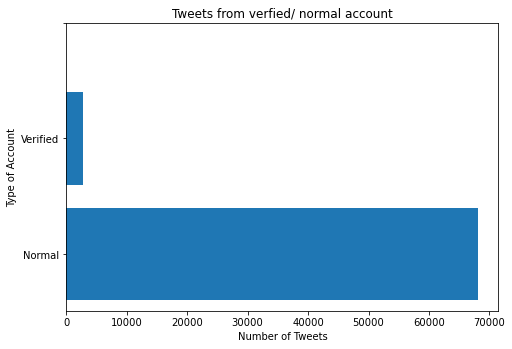

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# count the occurrence of each class 
data = tweets["verified"].value_counts() 
# get x and y data 
points = data.index
frequency = data.values
#plot graph
ax.barh(points,frequency)
ax.set_yticks([0,1,2])
ax.set_yticklabels(["Normal","Verified"])
plt.xlabel("Number of Tweets")
plt.ylabel("Type of Account")
plt.title("Tweets from verfied/ normal account")
plt.show()

There are 68098 accounts that are not verified and 2805 verified accounts.

In [9]:
tweets.user_id.value_counts()

1160866712041881600    327
954710848311738369     310
85306437               302
181491054              235
813027274547040256     210
                      ... 
875928665401380865       1
837600829                1
64689735                 1
1155574191846035457      1
2336372743               1
Name: user_id, Length: 27809, dtype: int64

In [14]:
tweets[tweets.user_id==1160866712041881600 ]['screen_name']

134      Devendr25548299
135      Devendr25548299
136      Devendr25548299
341      Devendr25548299
342      Devendr25548299
              ...       
70179    Devendr25548299
70180    Devendr25548299
70535    Devendr25548299
70538    Devendr25548299
70539    Devendr25548299
Name: screen_name, Length: 327, dtype: object

The Twitter account with the display name 'Devendr25548299' has created the most number of tweets with the above mentioned tags.

## Data Preprocessing

The tweets contains many unnecessary characters like html code, emojis and urls. We need to clean our data by removing these characters before we perform sentiment analysis. 

In [55]:
#Removing all punctuations and numbers
tweets.text = [re.sub('[^a-zA-Z]', ' ',i) for i in tweets.text]

#Converting into lower case 
tweets.text = [low.lower() for low in tweets.text]

#Removing Emojis
def preprocess(text):
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = re.sub('[\W]+',' ', text.lower()) +\
    ' '.join(emojis).replace('-','')
     
    return text
    
tweets.text=tweets.text.apply(preprocess)

#Removing URLs 

tweets.text = tweets.text.apply(lambda x: re.sub(r"https\S+", "", str(x)))
tweets.text.head(10)


0    may spirit season new year form invis host dif...
1    without shout peopl togeth year celebr happi v...
2    cia privat advis workforc take anti malari dru...
3    current situat give opportun evalu want stayho...
4    covid coronavirusoutbreakindia coronastopkaron...
5    maharashtra world smallest live woman jyoti am...
6    happi vishu everi one troublesom time wish fam...
7    stayhom staysaf covid quarantin stayhealthi co...
8    stayhom staysaf covid quarantin stayhealthi co...
9    stayhom staysaf covid quarantin stayhealthi co...
Name: text, dtype: object

After removing the irrelevant characters from the tweets, we will be removing the repetitve words from the tweets known as stopwords.

In [56]:
cachedStopWords=set(stopwords.words("english"))
print(cachedStopWords)

{'him', 'haven', 'have', 'each', 'they', 'don', "isn't", 'now', 'didn', 'are', 'he', 'wasn', 'y', 'then', "shouldn't", 'themselves', "wouldn't", 'into', 'itself', "haven't", 'most', 'when', 'after', 'm', 'their', 'can', "weren't", 'where', 'doesn', 'whom', 'ours', 'hers', 'again', 'no', 'or', "couldn't", 'yourselves', "you'll", 'been', 'had', 'hasn', 'an', 'ourselves', 'a', 'both', 'for', 'below', "you're", 'under', "aren't", 'because', 'by', 'down', 'd', 'ain', 'was', 'myself', "that'll", 'that', 'during', "don't", 'himself', 're', 'all', 'has', 'if', 'more', 'who', "shan't", 'so', "it's", 'of', 'isn', 'needn', 'some', 'did', 'with', 'those', 'but', "she's", "you've", 'me', 'this', 'there', 'further', 'than', 'very', 'what', 'here', 'she', 'having', "doesn't", 'any', 'while', 'other', 've', "wasn't", 'before', 'not', 'll', 'should', 'above', "should've", 'mightn', 'at', 'hadn', 'such', 'herself', 'is', 'ma', 'up', 'why', "won't", 'yours', 'yourself', 'mustn', "hadn't", 'your', "you'd"

After removing the stopwords, the next steps performed are stemming and lemmatizations to extract the original words that are tweeted by the user and then splitting the text into individual words.

In [58]:
#Removing Stop Words
tweets.text=tweets.text.apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in cachedStopWords]))

#Stemming

porter = PorterStemmer()
def stemWords(word):
    return porter.stem(word)
        
tweets["text"] = tweets["text"].apply(lambda tweet: ' '.join([stemWords(word) for word in tweet.split()]))

In [59]:
#Lemmatization: 
lema = WordNetLemmatizer()
def lemmatizeWords(word):
    return lema.lemmatize(word)
tweets.text = tweets.text.apply(lambda tweet: ' '.join([lemmatizeWords(word) for word in tweet.split()]))


#Preparing words by splitting the text
words=[]
words=[word for tweet in tweets.text for word in tweet.split()]

In [60]:
print(words[0:100])

['may', 'spirit', 'season', 'new', 'year', 'form', 'invi', 'host', 'difficulti', 'world', 'face', 'subho', 'noboborsho', 'famili', 'subhonoboborsho', 'poilabaisakh', 'stayhomestaysaf', 'fightcovid', 'without', 'shout', 'peopl', 'togeth', 'year', 'celebr', 'happi', 'vishu', 'tamil', 'new', 'year', 'stay', 'home', 'safe', 'let', 'pray', 'god', 'good', 'healthi', 'nation', 'u', 'tough', 'time', 'tamilnewyear', 'happyvishu', 'corono', 'stayhomestaysaf', 'cia', 'privat', 'advi', 'workforc', 'take', 'anti', 'malari', 'drug', 'hydroxychloroquin', 'tout', 'promi', 'treatment', 'coronaviru', 'potenti', 'danger', 'side', 'effect', 'includ', 'sudden', 'death', 'current', 'situat', 'give', 'opportun', 'evalu', 'want', 'stayhomestaysaf', 'smallbusi', 'covid', 'covid', 'coronavirusoutbreakindia', 'coronastopkarona', 'covid', 'india', 'coronaupdatesinindia', 'coronaoutbreak', 'coronafight', 'coronavirusoutbreakindia', 'covid', 'insa', 'coronaviruspandem', 'indiafightscorona', 'pmmodi', 'pmcaresfund',

## TfidfVectorizer

TfidfVectorizer is a method to transforms text to feature vectors that can be used as input to estimator giving the importance of the word in the sentence.<br>

It is used to classify documents, ranking in search engine.<br>
tf: term frequency(count of the words present in document from its own vocabulary), idf: inverse document frequency(importance of the word to each document).

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Definining the vectorizer 
vect = TfidfVectorizer(ngram_range=(1,1), max_features=100).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transforming to a data frame 
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
X.head(10)

,also,amp,april,bjp,care,case,china,come,corona,coronaviru,coronavirusindia,coronavirusoutbreak,coronaviruspandem,countri,covid,day,death,delhi,distanc,doctor,due,even,famili,fight,follow,get,go,good,govern,govt,hai,happi,health,help,home,hope,hospit,india,indiafightscorona,indiafightscoronaviru,indian,ji,let,life,light,like,live,lockdown,love,maharashtra,make,mask,may,minut,mohfw,mumbai,narendramodi,nation,need,new,news,number,one,pandem,patient,peopl,plea,pm,pmoindia,polic,posit,quarantin,report,safe,say,sir,social,socialdistanc,spread,state,stay,stayathom,stayhom,stayhomeindia,stayhomesavel,stayhomestaysaf,staysaf,support,take,test,thank,time,today,togeth,total,updat,use,viru,work,world
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.507267,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.503374,0.0,0.0,0.0,0.000000,0.000000,0.0,0.466077,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.258805,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.452866
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.316053,0.0,0.0,0.0,0.326319,0.0,0.0,0.263912,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.301402,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.329155,0.0,0.295429,0.0,0.0,0.000000,0.0,0.0,0.257272,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.300245,0.0,0.0,0.0,0.000000,0.000000,0.0,0.278434,0.0,0.000000,0.0,0.0,0.164046,0.000000,0.0,0.000000,0.0,0.0,0.266253,0.0,0.325345,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.320298,0.0,0.0,0.000000,0.0,0.000000,0.0,0.670392,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.669315,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.499773,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.866157,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.384111,0.0,0.403383,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.262475,0.637954,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.302537,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.349763,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.175963,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.394947,0.000000,0.0,0.407937,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.31

## Sentiment Analysis

In [26]:
from textblob import TextBlob

In [28]:
pol=[]
for text in tweets.text:
    blob = TextBlob(text)
    pol.append(blob.sentiment.polarity)

In [ ]:
tweets['Polarity']=pol
tweets.head(10)

In [154]:
positive=0
negative=0
neutral=0
for pol in tweets.Polarity:
    if pol>0:
        positive+=1
    elif pol<0:
        negative+=1
    else:
        neutral+=1
print("Positve Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)


Positve Tweets: 17344
Negative Tweets: 5693
Neutral Tweets 47866


We will be using the Vader Sentiment Analyzer to get the comprehensive polarity of the tweets.

In [45]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...


True

In [47]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = tweets.text.apply(lambda x: sid.polarity_scores(x))
sentimental_score = pd.DataFrame(list(sentiment_scores))
sentimental_score.tail()

,neg,neu,pos,compound
70898,0.0,0.777,0.223,0.5574
70899,0.0,0.815,0.185,0.6124
70900,0.0,1.000,0.000,0.0000
70901,0.0,1.000,0.000,0.0000
70902,0.0,0.712,0.288,0.7964


In [48]:
sentimental_score['val'] = sentimental_score['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sentimental_score.head()

,neg,neu,pos,compound,val
0,0.000,0.909,0.091,0.1779,positive
1,0.046,0.642,0.312,0.8271,positive
2,0.410,0.590,0.000,-0.8779,negative
3,0.000,0.860,0.140,0.0772,positive
4,0.000,1.000,0.000,0.0000,neutral


## Visualizations

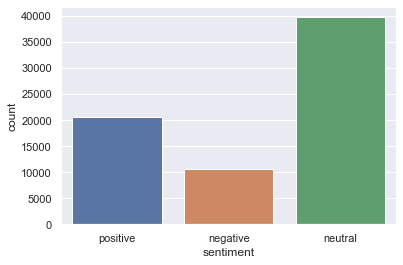

In [50]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

Majority of the tweets are either off neutral or postive nature with less negative tweets.

In [52]:
sentiments_time = pd.DataFrame()
sentiments_time['time'] = tweets['created_at']
sentiments_time['polarity'] = sentimental_score['compound']
sentiments_time.index = pd.to_datetime(sentiments_time['time'])

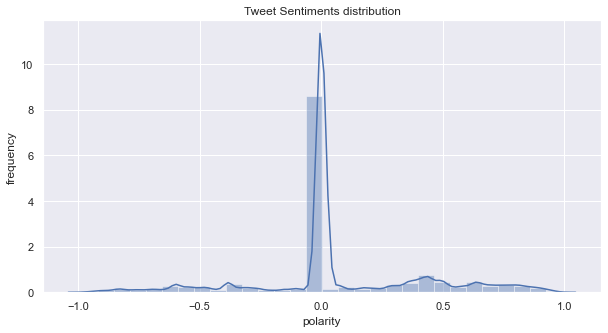

In [53]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Tweet Sentiments distribution', xlabel='polarity', ylabel='frequency')
sns.distplot(sentiments_time['polarity'], bins=30, ax=ax)

This plot gives the distibution of the polarity of the tweets with a majority tweets off neutral polarity.

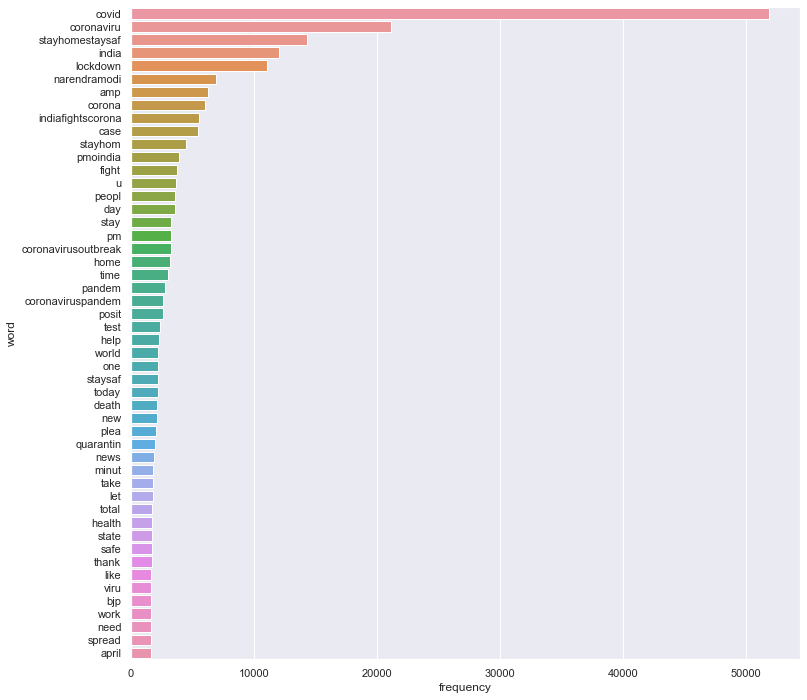

In [62]:
sns.set(style="darkgrid")
counts = Counter(words).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)

This plot gives the frequency of the words used in the tweets.

### WordCloud

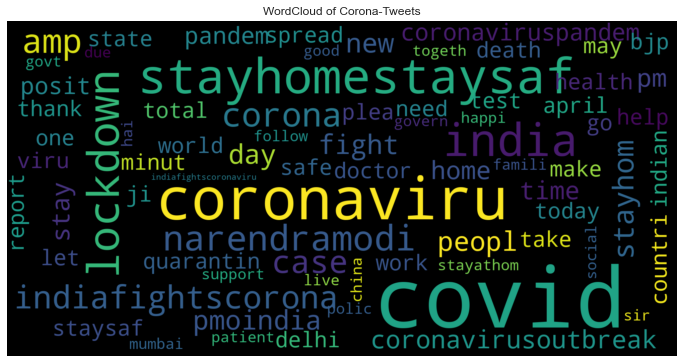

In [61]:
from wordcloud import WordCloud
wordcloud=WordCloud(background_color='black',max_words=75,max_font_size=50,scale=5,collocations=False,
                      normalize_plurals=True).generate(' '.join(words))
                       
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Corona-Tweets")
plt.show()

## Conclusion

From the sentiment analysis and the visualizations plots made, we can conclude that the Indian citizens are have a fair and positive attitude towards the Phase-1 of the lockdown set by the government. 